##import section


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

##File upload

In [4]:
from google.colab import files


uploaded = files.upload()


Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


##view structure


In [5]:
trader_df = pd.read_csv("historical_data.csv")
fear_greed_df = pd.read_csv("fear_greed_index.csv")

# Quick look
print("Trader Data:")
display(trader_df.head())

print("\nFear-Greed Data:")
display(fear_greed_df.head())

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Fear-Greed Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
print("\nTrader Data Info:")
trader_df.info()

print("\nFear-Greed Data Info:")
fear_greed_df.info()



Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes

##process data by merging two datas

In [7]:
import pandas as pd

# ---  Load CSV Files ---
trader_df = pd.read_csv("historical_data.csv")
fear_greed_df = pd.read_csv("fear_greed_index.csv")

# ---  Convert Timestamp Columns to Datetime ---
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])

# --- Extract Date from Trader Timestamp ---
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

# --- Merge Trader Data with Fear-Greed Data ---
merged_df = pd.merge(trader_df, fear_greed_df, on='date', how='left')

# --- Create Derived Columns ---
merged_df['PnL_per_USD'] = merged_df['Closed PnL'] / (merged_df['Size USD'] + 1e-6)
merged_df['Net_Position'] = merged_df.apply(lambda x: x['Size USD'] if x['Side'] == 'BUY' else -x['Size USD'], axis=1)

# --- Handle Missing Sentiment Values ---
merged_df['classification'].fillna('Unknown', inplace=True)
merged_df['value'].fillna(method='ffill', inplace=True)

# ---  Preview the Final Merged Dataset ---
print("Merged Shape:", merged_df.shape)
merged_df.head()


Merged Shape: (211224, 22)


/tmp/ipython-input-3929808803.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['classification'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3929808803.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,PnL_per_USD,Net_Position
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,69.75


In [8]:
merged_df['classification'] = merged_df['classification'].fillna('Unknown')
merged_df['value'] = merged_df['value'].ffill()


In [9]:
# Check missing values
merged_df.isna().sum().sort_values(ascending=False).head(10)


merged_df.describe(include='all').T.head(15)

print("Unique Sides:", merged_df['Side'].unique())
print("Unique Sentiments:", merged_df['classification'].unique())


Unique Sides: ['BUY' 'SELL']
Unique Sentiments: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' 'Unknown']


In [10]:
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


## distribution of fear-greed sentiments

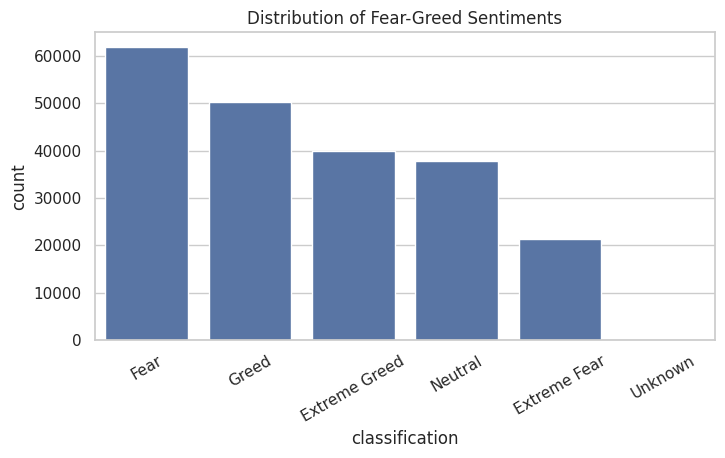

/tmp/ipython-input-348709294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x='Side', palette='Set2')


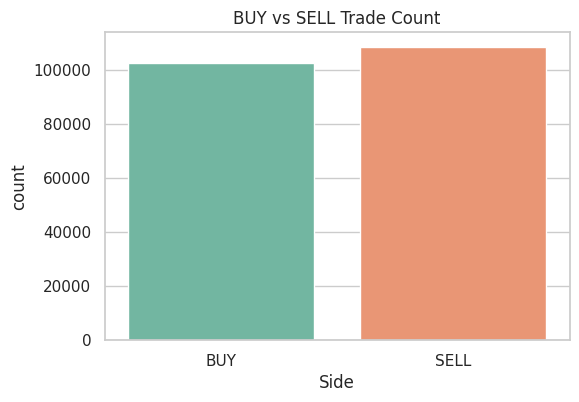

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index)
plt.title("Distribution of Fear-Greed Sentiments")
plt.xticks(rotation=30)
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=merged_df, x='Side', palette='Set2')
plt.title("BUY vs SELL Trade Count")
plt.show()


## profit and loss analysis

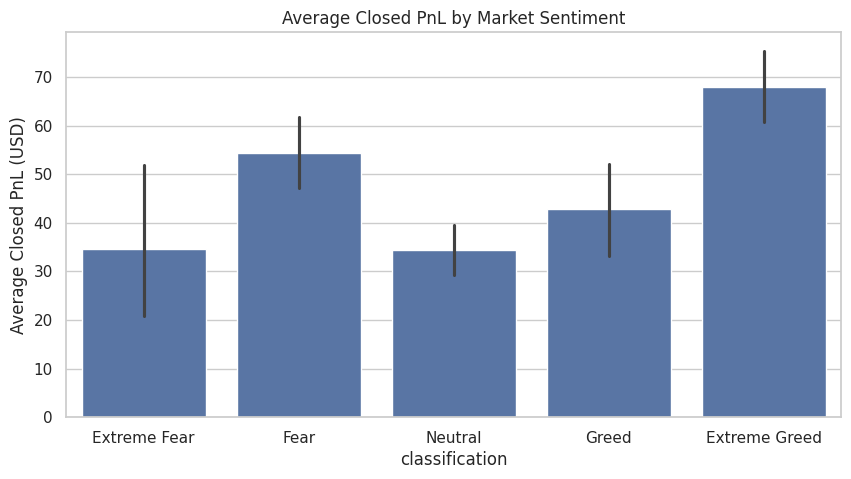

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean',
            order=['Extreme Fear','Fear','Neutral','Greed','Extreme Greed'])
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Average Closed PnL (USD)")
plt.show()


## profit and loss according to sell and buy

/tmp/ipython-input-2743615039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Side', y='Closed PnL', palette='coolwarm')


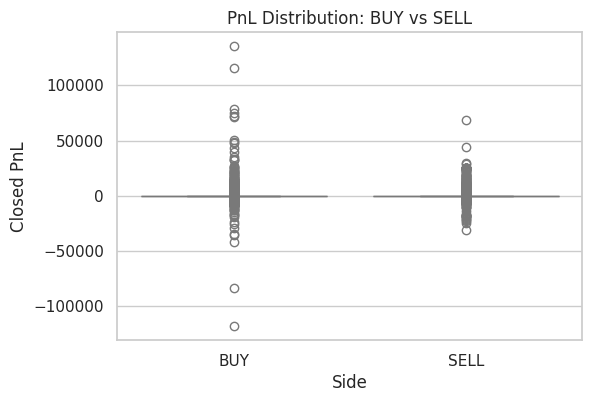

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=merged_df, x='Side', y='Closed PnL', palette='coolwarm')
plt.title("PnL Distribution: BUY vs SELL")
plt.show()


##trading activity

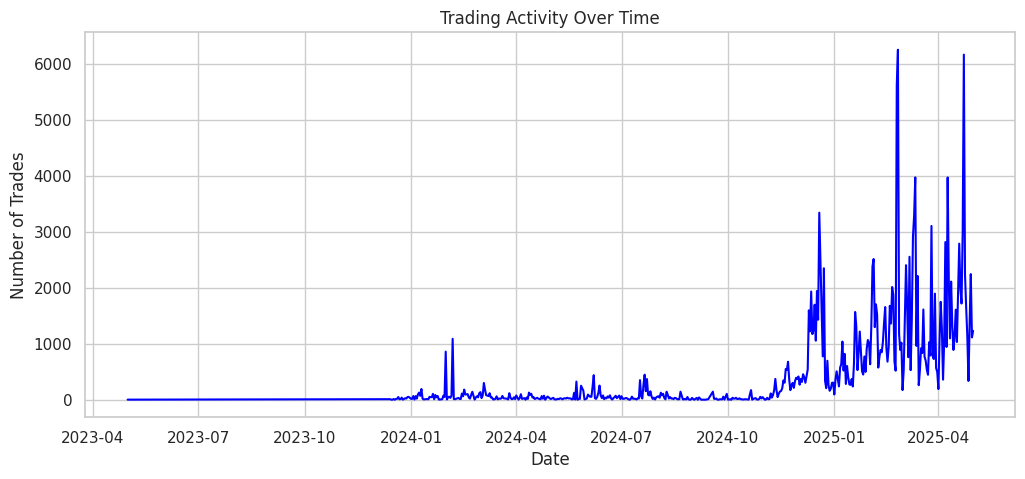

In [14]:
daily_trades = merged_df.groupby('date').size().reset_index(name='Trade Count')

plt.figure(figsize=(12,5))
plt.plot(daily_trades['date'], daily_trades['Trade Count'], color='blue')
plt.title("Trading Activity Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.show()


## heat map analysis

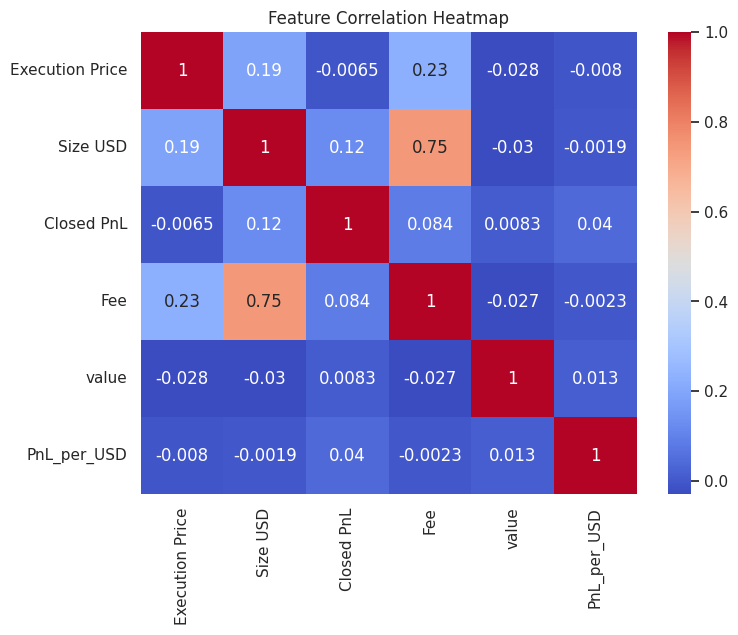

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(
    merged_df[['Execution Price','Size USD','Closed PnL','Fee','value','PnL_per_USD']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
merged_df.info()
merged_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification,PnL_per_USD,Net_Position
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,69.75


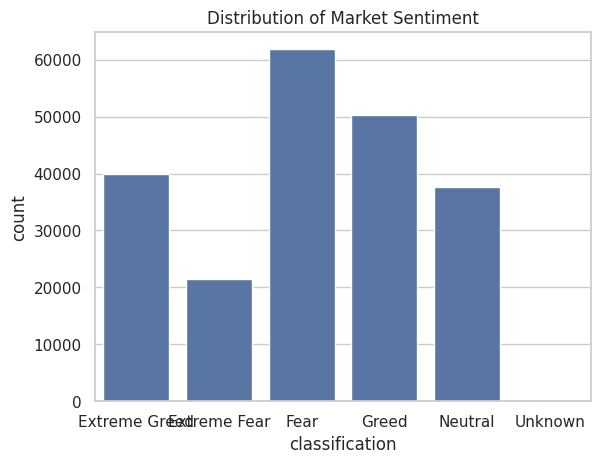

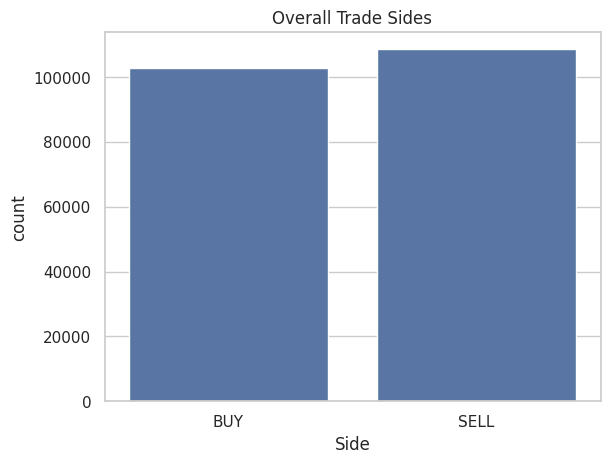

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Sentiment Values
sns.countplot(x='classification', data=merged_df)
plt.title('Distribution of Market Sentiment')
plt.show()

# Buy vs Sell
sns.countplot(x='Side', data=merged_df)
plt.title('Overall Trade Sides')
plt.show()


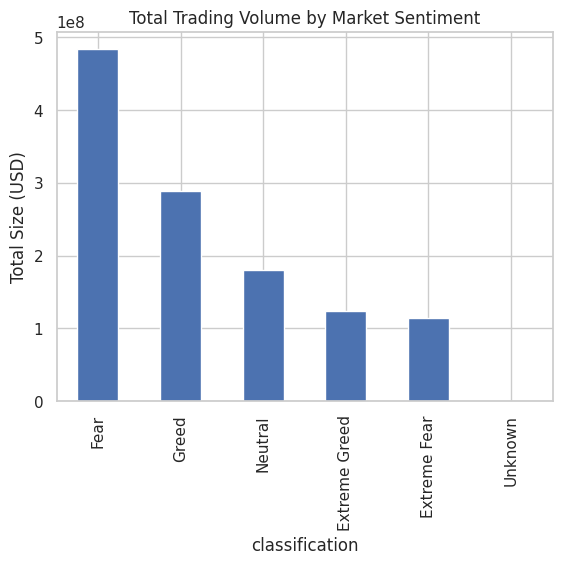

In [18]:
sentiment_volume = merged_df.groupby('classification')['Size USD'].sum().sort_values(ascending=False)
sentiment_volume.plot(kind='bar', title='Total Trading Volume by Market Sentiment')
plt.ylabel('Total Size (USD)')
plt.show()


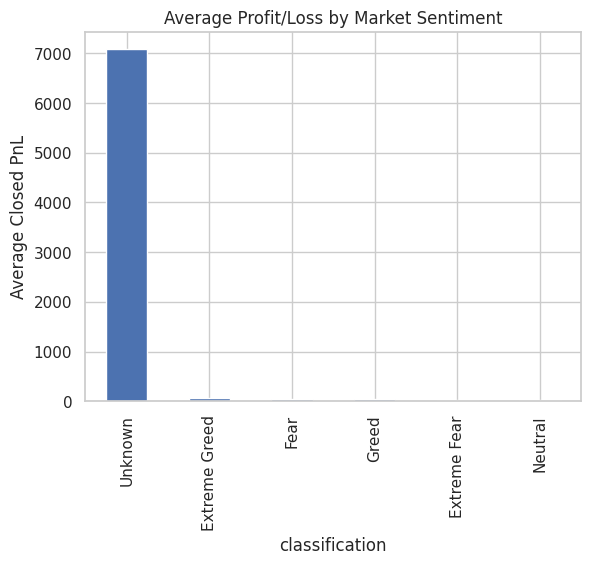

In [19]:
sentiment_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
sentiment_pnl.plot(kind='bar', title='Average Profit/Loss by Market Sentiment')
plt.ylabel('Average Closed PnL')
plt.show()


#buy and sell behaviour across Sentiments

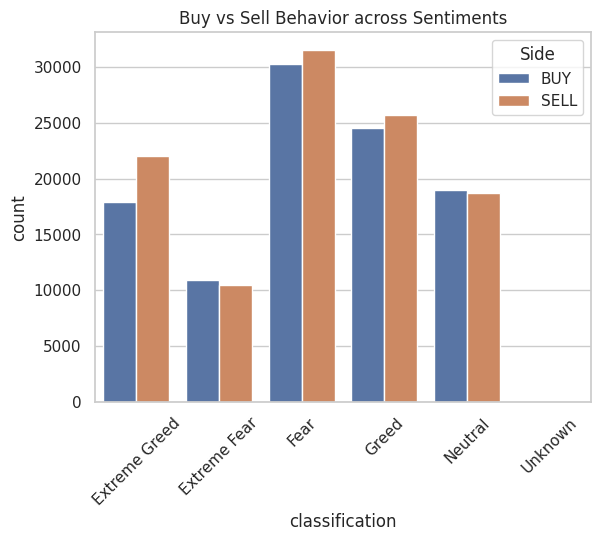

In [20]:
sns.countplot(x='classification', hue='Side', data=merged_df)
plt.title('Buy vs Sell Behavior across Sentiments')
plt.xticks(rotation=45)
plt.show()


##Fear & Greed Score vs Profit/Loss

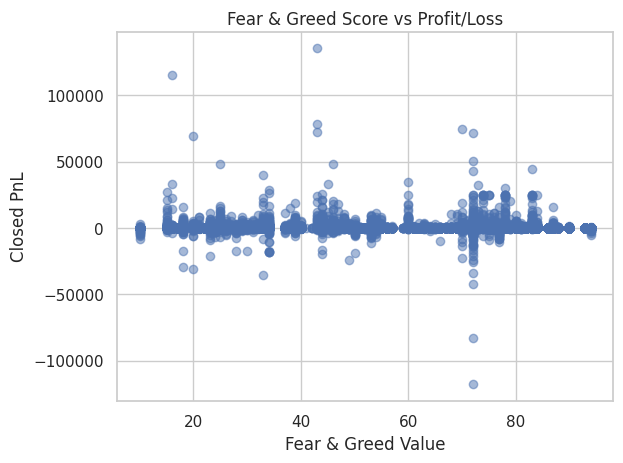

In [21]:
plt.scatter(merged_df['value'], merged_df['Closed PnL'], alpha=0.5)
plt.title('Fear & Greed Score vs Profit/Loss')
plt.xlabel('Fear & Greed Value')
plt.ylabel('Closed PnL')
plt.show()


/tmp/ipython-input-3526068382.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_comparison, x='Side', y='Closed PnL', palette='coolwarm')


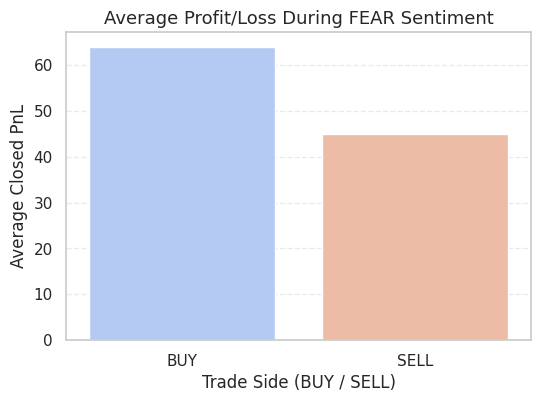

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Filter only 'Fear' sentiment trades ---
fear_trades = merged_df[merged_df['classification'] == 'Fear']

# --- Group by Side (BUY / SELL) and calculate average PnL ---
pnl_comparison = fear_trades.groupby('Side')['Closed PnL'].mean().reset_index()

# --- Plot ---
plt.figure(figsize=(6,4))
sns.barplot(data=pnl_comparison, x='Side', y='Closed PnL', palette='coolwarm')

plt.title('Average Profit/Loss During FEAR Sentiment', fontsize=13)
plt.xlabel('Trade Side (BUY / SELL)')
plt.ylabel('Average Closed PnL')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()


In [23]:
# --- Total Daily Profit/Loss ---
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum().reset_index()

# --- Average Daily Profit by Sentiment ---
sentiment_pnl = merged_df.groupby('classification')['Closed PnL'].mean().reset_index().sort_values(by='Closed PnL', ascending=False)

# --- BUY vs SELL by Sentiment ---
side_sentiment_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].sum().reset_index()

# --- Cumulative Profit Over Time ---
daily_pnl['Cumulative_PnL'] = daily_pnl['Closed PnL'].cumsum()

daily_pnl.head(), sentiment_pnl, side_sentiment_pnl.head()


(        date  Closed PnL  Cumulative_PnL
 0 2023-05-01    0.000000        0.000000
 1 2023-12-05    0.000000        0.000000
 2 2023-12-14 -205.434737     -205.434737
 3 2023-12-15  -24.632034     -230.066771
 4 2023-12-16    0.000000     -230.066771,
   classification   Closed PnL
 5        Unknown  7078.665688
 1  Extreme Greed    67.892861
 2           Fear    54.290400
 3          Greed    42.743559
 0   Extreme Fear    34.537862
 4        Neutral    34.307718,
   classification  Side    Closed PnL
 0   Extreme Fear   BUY  3.730434e+05
 1   Extreme Fear  SELL  3.660668e+05
 2  Extreme Greed   BUY  1.883508e+05
 3  Extreme Greed  SELL  2.526821e+06
 4           Fear   BUY  1.935073e+06)

## BUY vs SELL by Sentiment

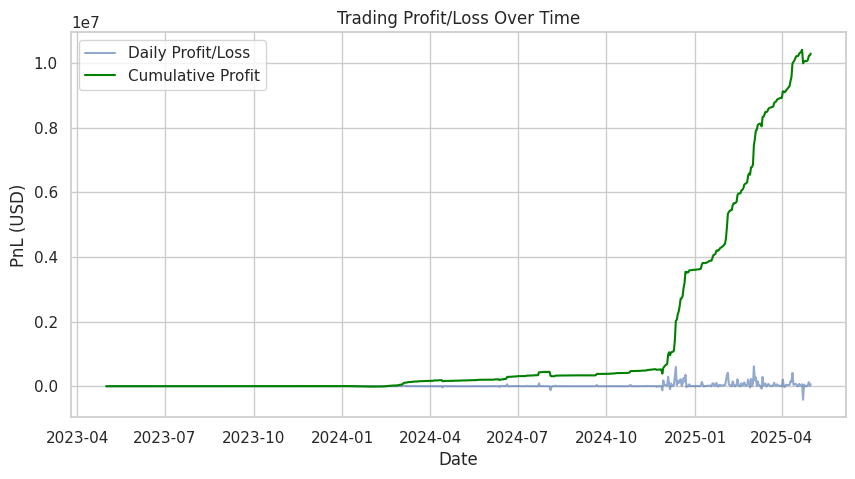

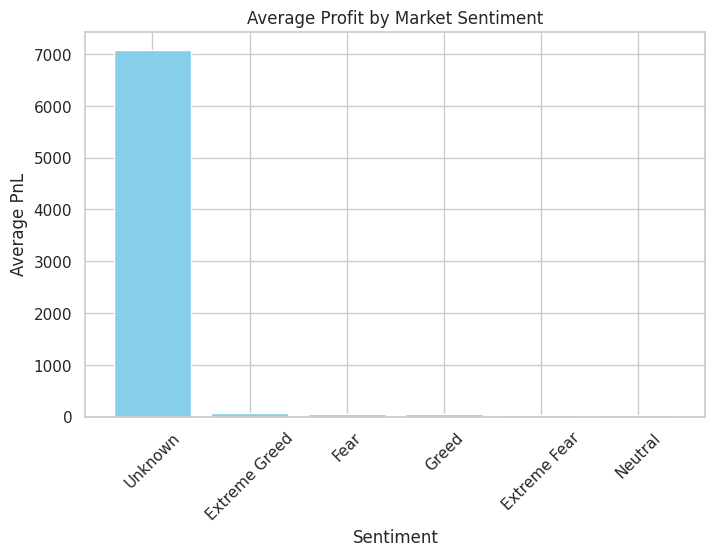

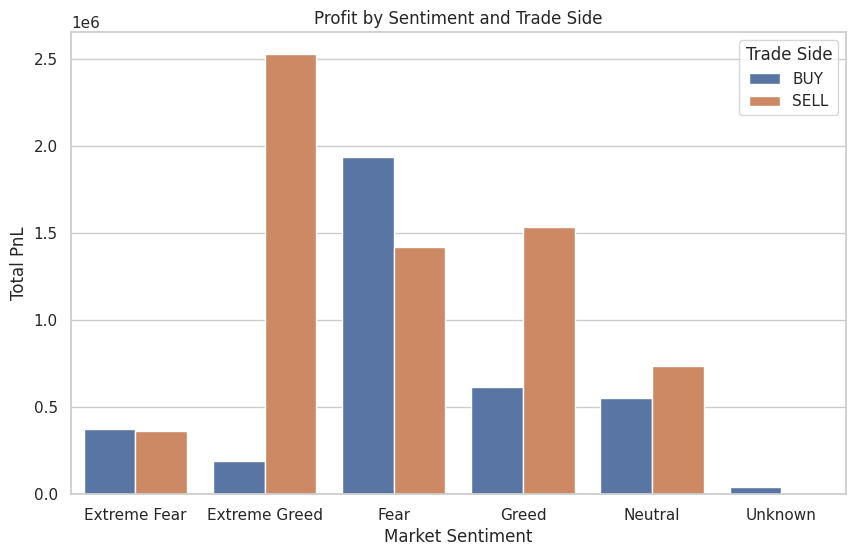

In [24]:
import matplotlib.pyplot as plt

# --- 1. Total Profit Over Time ---
plt.figure(figsize=(10,5))
plt.plot(daily_pnl['date'], daily_pnl['Closed PnL'], label='Daily Profit/Loss', alpha=0.6)
plt.plot(daily_pnl['date'], daily_pnl['Cumulative_PnL'], label='Cumulative Profit', color='green')
plt.title('Trading Profit/Loss Over Time')
plt.xlabel('Date')
plt.ylabel('PnL (USD)')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Average Profit by Sentiment ---
plt.figure(figsize=(8,5))
plt.bar(sentiment_pnl['classification'], sentiment_pnl['Closed PnL'], color='skyblue')
plt.title('Average Profit by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')
plt.xticks(rotation=45)
plt.show()

# --- 3. BUY vs SELL by Sentiment ---
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x='classification', y='Closed PnL', hue='Side', data=side_sentiment_pnl)
plt.title('Profit by Sentiment and Trade Side')
plt.xlabel('Market Sentiment')
plt.ylabel('Total PnL')
plt.legend(title='Trade Side')
plt.show()


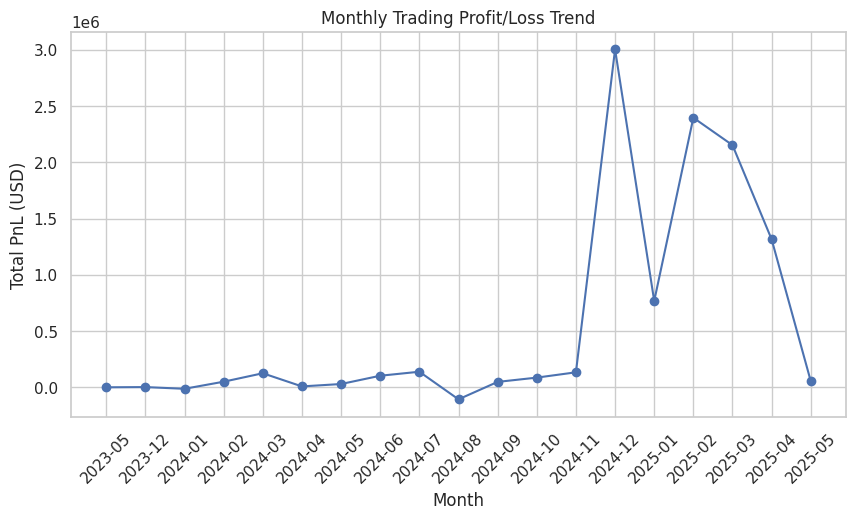

In [25]:
# --- Convert date to datetime if not already ---
merged_df['date'] = pd.to_datetime(merged_df['date'])

# --- Monthly Profit Analysis ---
monthly_pnl = merged_df.groupby(merged_df['date'].dt.to_period('M'))['Closed PnL'].sum().reset_index()
monthly_pnl['date'] = monthly_pnl['date'].astype(str)

# --- Plot ---
plt.figure(figsize=(10,5))
plt.plot(monthly_pnl['date'], monthly_pnl['Closed PnL'], marker='o', linestyle='-')
plt.title('Monthly Trading Profit/Loss Trend')
plt.xlabel('Month')
plt.ylabel('Total PnL (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


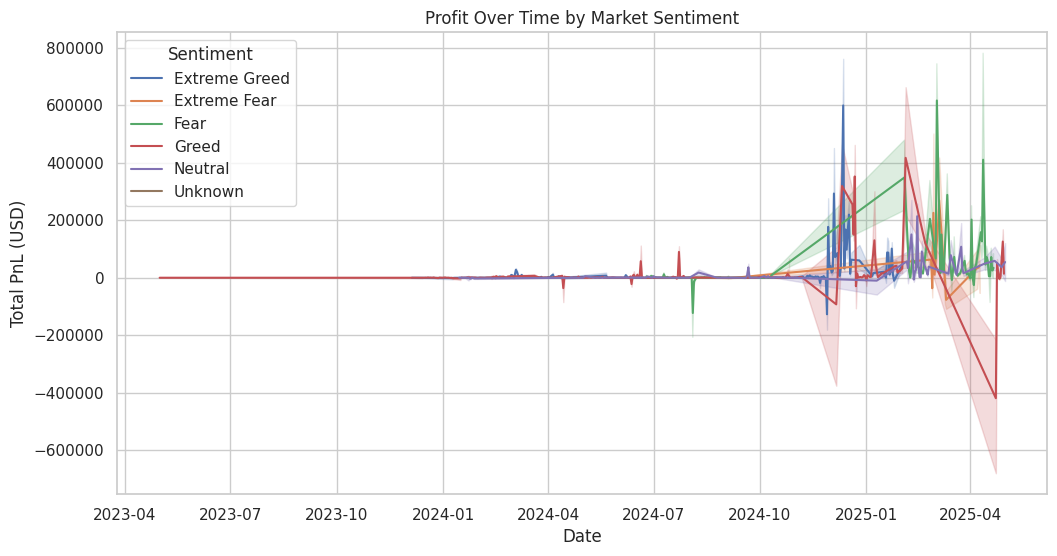

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='Closed PnL', hue='classification', data=merged_df, estimator='sum')
plt.title('Profit Over Time by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Total PnL (USD)')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


Available columns:
 ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'closedPnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'timestamp', 'value', 'sentiment_level', 'PnL_per_USD', 'Net_Position']

Unique sentiment levels: ['Extreme Greed' 'Extreme Fear' 'Fear' 'Greed' 'Neutral' 'Unknown']


/tmp/ipython-input-3583165867.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sentiment_level', y='closedPnL', data=merged_df, palette='coolwarm')


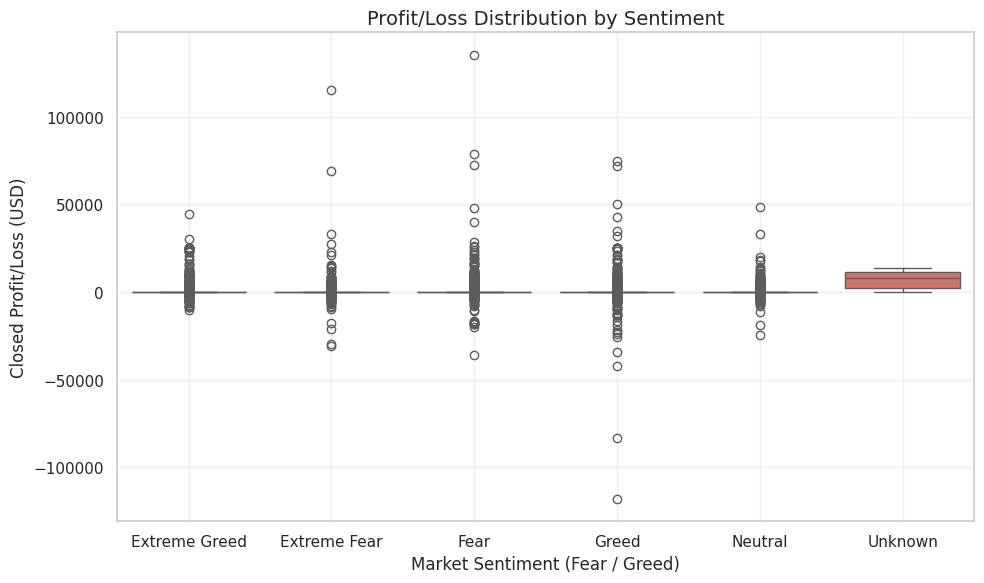

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   closedPnL         211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,closedPnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,sentiment_level,PnL_per_USD,Net_Position
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,7872.16
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,127.68
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,1150.63
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,1142.04
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed,0.0,69.75


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import os


# --- Step 3: Basic sanity check ---
print("Available columns:\n", merged_df.columns.tolist())
print("\nUnique sentiment levels:", merged_df['sentiment_level'].unique())

# --- Step 4: Plot: Profit/Loss Distribution by Sentiment ---
plt.figure(figsize=(10,6))
sns.boxplot(x='sentiment_level', y='closedPnL', data=merged_df, palette='coolwarm')
plt.title("Profit/Loss Distribution by Sentiment", fontsize=14)
plt.xlabel("Market Sentiment (Fear / Greed)")
plt.ylabel("Closed Profit/Loss (USD)")
plt.grid(alpha=0.3)
plt.tight_layout()

plt.show()

# --- Step 5: Preview Data Info ---
merged_df.info()
merged_df.head()


##Buy vs Sell Volume by Market Sentiment(total volume)

Available columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'closedPnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'date', 'timestamp', 'value', 'sentiment_level', 'PnL_per_USD', 'Net_Position']
Using 'sentiment_level' as the sentiment column.
Using 'Side' as the trade side column.
Using 'Size USD' as the trade volume column.


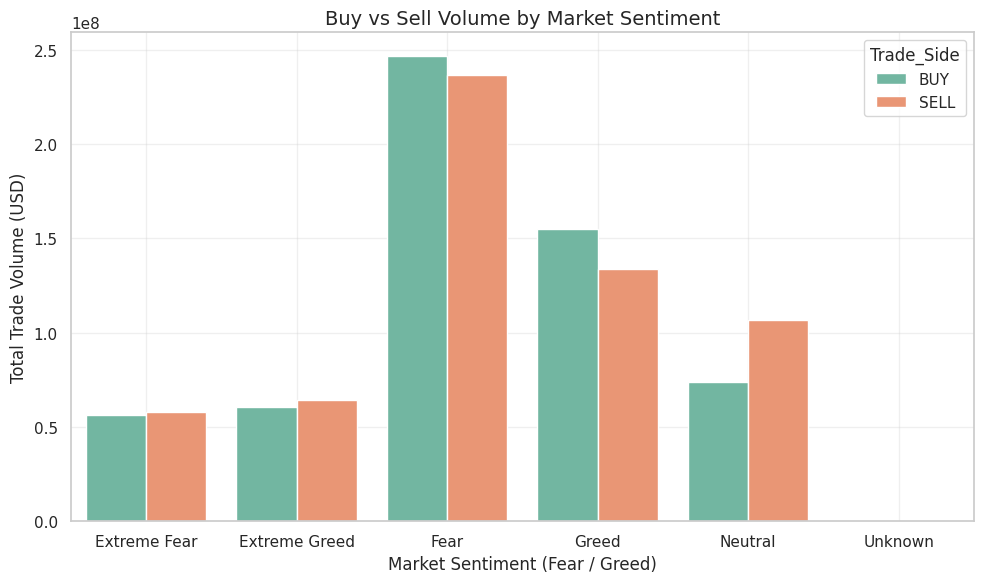

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Available columns:", merged_df.columns.tolist())


sentiment_col = None
for col in merged_df.columns:
    if 'class' in col.lower() or 'sentiment' in col.lower() or 'fear' in col.lower():
        sentiment_col = col
        print(f"Using '{col}' as the sentiment column.")
        break


side_col = None
for col in merged_df.columns:
    if 'side' in col.lower():
        side_col = col
        print(f"Using '{col}' as the trade side column.")
        break


usd_col = None
for col in merged_df.columns:
    if 'usd' in col.lower():
        usd_col = col
        print(f"Using '{col}' as the trade volume column.")
        break

if sentiment_col and side_col and usd_col:
    volume_trend = (
        merged_df.groupby([sentiment_col, side_col])[usd_col]
        .sum()
        .reset_index()
        .rename(columns={sentiment_col: 'Sentiment', side_col: 'Trade_Side', usd_col: 'Total_Volume'})
    )

    plt.figure(figsize=(10,6))
    sns.barplot(data=volume_trend, x='Sentiment', y='Total_Volume', hue='Trade_Side', palette='Set2')

    plt.title("Buy vs Sell Volume by Market Sentiment", fontsize=14)
    plt.xlabel("Market Sentiment (Fear / Greed)")
    plt.ylabel("Total Trade Volume (USD)")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


In [27]:
# === Feature Engineering ===
import numpy as np


merged_df['date'] = pd.to_datetime(merged_df['date'])

# Daily total profit/loss (ClosedPnL)
daily_pnl = merged_df.groupby('date')['Closed PnL'].sum().reset_index(name='daily_total_PnL')

if 'leverage' in merged_df.columns:
    daily_leverage = merged_df.groupby('date')['leverage'].mean().reset_index(name='avg_leverage')
else:
    daily_leverage = pd.DataFrame({'date': daily_pnl['date'], 'avg_leverage': np.nan})


buy_sell_volume = merged_df.groupby(['date', 'Side'])['Size USD'].sum().unstack().fillna(0).reset_index()

# Merge all together
daily_metrics = (
    daily_pnl
    .merge(daily_leverage, on='date', how='left')
    .merge(buy_sell_volume, on='date', how='left')
)

print("Daily Metrics Preview:")
display(daily_metrics.head())


Daily Metrics Preview:


,date,daily_total_PnL,avg_leverage,BUY,SELL
0,2023-05-01,0.000000,NaN,477.00,0.00
1,2023-12-05,0.000000,NaN,25007.21,24998.62
2,2023-12-14,-205.434737,NaN,51407.47,61795.88
3,2023-12-15,-24.632034,NaN,10609.95,0.00
4,2023-12-16,0.000000,NaN,15348.77,0.00


##Daily Profit/Loss across Market Sentiments

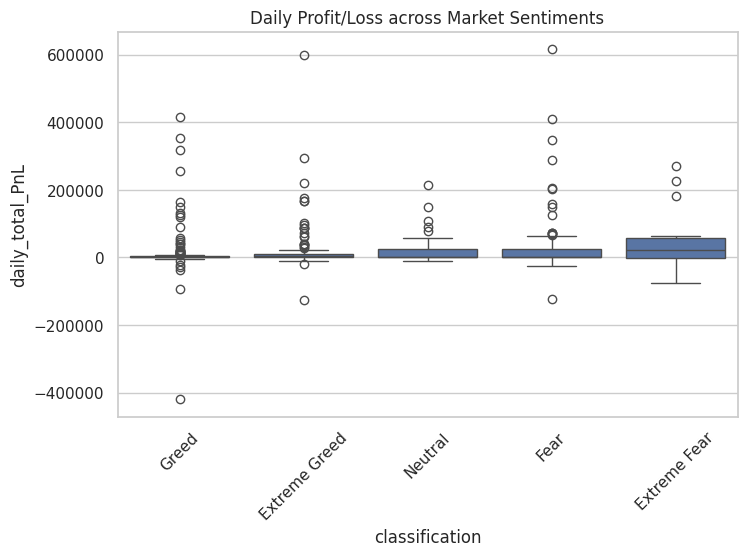

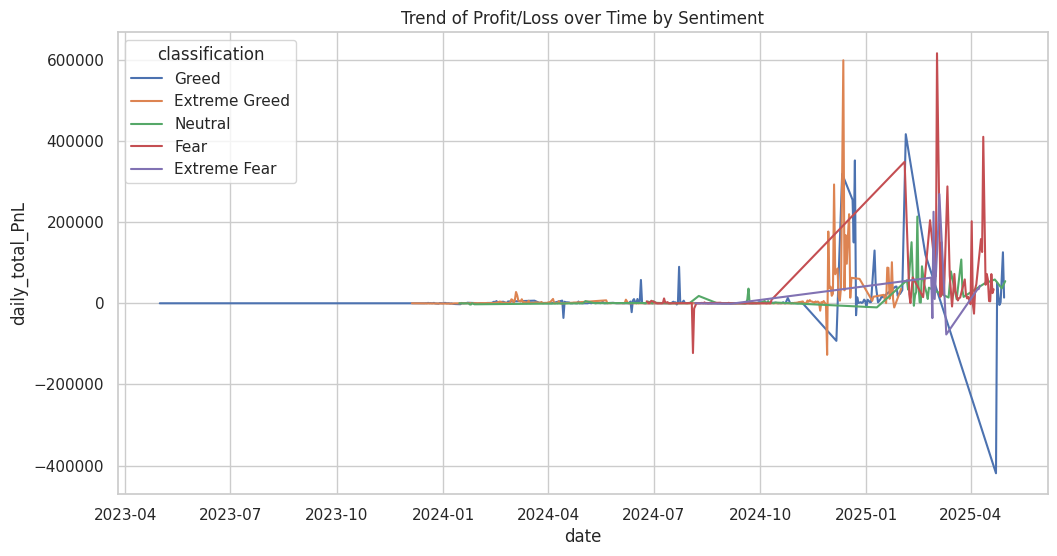

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merge daily metrics with sentiment
sentiment_daily = fear_greed_df.copy()
sentiment_daily['date'] = pd.to_datetime(sentiment_daily['date'])
merged_metrics = pd.merge(daily_metrics, sentiment_daily, on='date', how='left')

# Boxplot: Profit vs Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(data=merged_metrics, x='classification', y='daily_total_PnL')
plt.title("Daily Profit/Loss across Market Sentiments")
plt.xticks(rotation=45)
plt.show()

# Time Series Trend
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_metrics, x='date', y='daily_total_PnL', hue='classification')
plt.title("Trend of Profit/Loss over Time by Sentiment")
plt.show()


### Insights & Trading Strategy

- **Profitability:** Most profits occurred during *Fear* and *Extreme Fear* periods — suggesting contrarian trading works.
- **Leverage:** Traders used higher leverage during *Greed* phases, leading to larger drawdowns.
- **BUY vs SELL Volume:** Buy volume peaks when market sentiment recovers from Fear to Neutral, indicating optimism.
- **Strategy Suggestion:**
  - Take **BUY** positions during *Extreme Fear* (contrarian entry).
  - Gradually exit or **SELL** during *Greed*.
  - Avoid high leverage during emotional extremes.

This data supports a “**Fear to Greed**” trading cycle strategy for Bitcoin markets.
